# DSCI 200
## Final Project: Baseball Projections
### Russell Whitworth

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Import Baseball Savant Dataset

In [ ]:
#import baseball savant dataset
savantstats = pd.read_csv('stats.csv')

# Drop extra columns
savantstats = savantstats.drop('Unnamed: 20', axis = 1)

savantstats.head()

,last_name,first_name,player_id,year,player_age,b_ab,b_total_hits,b_home_run,b_strikeout,b_k_percent,batting_avg,slg_percent,b_sac_fly,xba,xslg,xobp,xbadiff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
0,Cabrera,Miguel,408234,2021,38,472,121,15,118,22.4,0.256,0.386,9,0.234,0.420,0.301,0.022,91.4,10.0,8.3
1,Cruz Jr.,Nelson,443558,2021,41,513,136,32,126,21.6,0.265,0.497,9,0.265,0.514,0.341,0.000,92.9,11.8,13.6
2,Peralta,David,444482,2021,34,487,126,8,92,17.1,0.259,0.402,2,0.243,0.345,0.313,0.016,89.3,5.3,5.0
3,Blackmon,Charlie,453568,2021,35,514,139,13,91,15.6,0.270,0.411,3,0.292,0.457,0.370,-0.022,87.6,10.2,7.0
4,McCutchen,Andrew,457705,2021,35,482,107,27,132,23.0,0.222,0.444,7,0.240,0.431,0.352,-0.018,88.8,14.6,9.0


## Calculating BABIP and Estimated xBA

In [ ]:
# BABIP = (H-HR)/(AB-HR-K+SF)
savantstats["BABIP"] = ((savantstats["b_total_hits"] - savantstats["b_home_run"]) / (savantstats["b_ab"] - savantstats["b_home_run"] - savantstats["b_strikeout"] + savantstats ["b_sac_fly"]))

# Estimated xBA = (1-K%)*BABIP
savantstats['est_xBA'] = ((1-savantstats['b_k_percent']/100)*(savantstats["BABIP"]))

# Look for results
savantstats[['BABIP', 'est_xBA']].head()

,BABIP,est_xBA
0,0.304598,0.236368
1,0.285714,0.224000
2,0.303342,0.251470
3,0.305085,0.257492
4,0.242424,0.186667


## Scatterplot of Estimated xBA Against True xBA with AVG Centerline

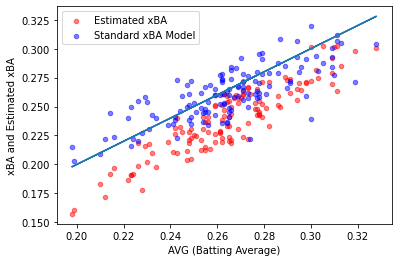

In [ ]:
# AVG against est_xBA and xBA
ax1 = savantstats.plot.scatter(x='batting_avg', y='est_xBA', c='r', alpha = 0.5, label='Estimated xBA')
savantstats.plot.scatter(x='batting_avg', y='xba', c='b', ax=ax1, alpha = 0.5, label='Standard xBA Model')
ax1.set_xlabel("AVG (Batting Average)")
ax1.set_ylabel("xBA and Estimated xBA")

x = savantstats['batting_avg']
plt.plot(x, x)

plt.savefig('avg_against_xba_models.png')

## New Estimated xBA Model 2

In [ ]:
# Estimated xBA = (1-K%)*BABIP + (HR/AB)
savantstats['est_xBA2'] = ((1-savantstats['b_k_percent']/100)*(savantstats["BABIP"]) + (savantstats['b_home_run'] / savantstats['b_ab']))

# Look for results
savantstats[['BABIP', 'est_xBA2']].head()

,BABIP,est_xBA2
0,0.304598,0.268147
1,0.285714,0.286378
2,0.303342,0.267898
3,0.305085,0.282783
4,0.242424,0.242683


## Scatterplot of Estimated xBA Model 2 Against True xBA with AVG Centerline

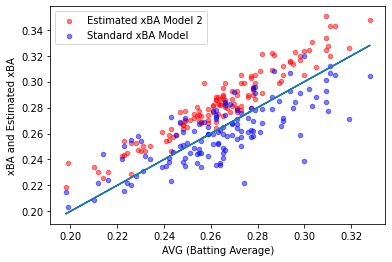

In [ ]:
ax1 = savantstats.plot.scatter(x='batting_avg', y='est_xBA2', c='r', alpha = 0.5, label='Estimated xBA Model 2')
savantstats.plot.scatter(x='batting_avg', y='xba', c='b', ax=ax1, alpha = 0.5, label='Standard xBA Model')
ax1.set_xlabel("AVG (Batting Average)")
ax1.set_ylabel("xBA and Estimated xBA")

x = savantstats['batting_avg']
plt.plot(x, x)

plt.savefig('avg_against_xba_second_model.png')

## Residual for xBA Model 2 using BABIPwHR

In [ ]:
# xBA Model 2 Residual = BA - xBA2
savantstats['xBA2diff'] = (savantstats['batting_avg'] - savantstats["est_xBA2"])

## Comparing the Highest and Lowest Residuals for Each Model

In [ ]:
sortedview = savantstats[['last_name', 'xba', 'est_xBA2', 'xbadiff', 'xBA2diff', 'b_home_run']]
# Sorting the savantstat residual from highest to lowest
high2lowstandard = sortedview.sort_values(by="xbadiff", ascending=False)

# Sorting the savantstat residual from lowest to highest
low2highstandard = sortedview.sort_values(by="xbadiff", ascending=True)

# Sorting the xBA Model 2 residual from highest to lowest
high2lowmodel2 = sortedview.sort_values(by="xBA2diff", ascending=False)

# Sorting the xBA Model 2 residual from lowest to highest
low2highmodel2 = sortedview.sort_values(by="xBA2diff", ascending=True)

print('xBA Winners')
print(high2lowstandard.head())
print('#' * 32)
print(high2lowmodel2.head())

print('#' * 64)
print('xBA Losers')
print(low2highstandard.head())
print('#' * 32)
print(low2highmodel2.head())

xBA Winners
     last_name    xba  est_xBA2  xbadiff  xBA2diff  b_home_run
130      Lopez  0.239  0.305305    0.061 -0.005305           2
124  Arozarena  0.222  0.299072    0.052 -0.025072          20
11     Gurriel  0.271  0.326237    0.048 -0.007237          15
30    Crawford  0.259  0.320107    0.039 -0.022107          24
20       Marte  0.277  0.327361    0.033 -0.017361          12
################################
      last_name    xba  est_xBA2  xbadiff  xBA2diff  b_home_run
113    Fletcher  0.273  0.264115   -0.011 -0.002115           2
74       Newman  0.255  0.228473   -0.029 -0.002473           5
57   Merrifield  0.263  0.279923    0.014 -0.002923          10
7        Andrus  0.273  0.246564   -0.030 -0.003564           3
68        Tapia  0.250  0.278255    0.023 -0.005255           6
################################################################
xBA Losers
   last_name    xba  est_xBA2  xbadiff  xBA2diff  b_home_run
8    Santana  0.244  0.225588   -0.030 -0.011588        

## Create Pairplot to find most correlated variables with AVG

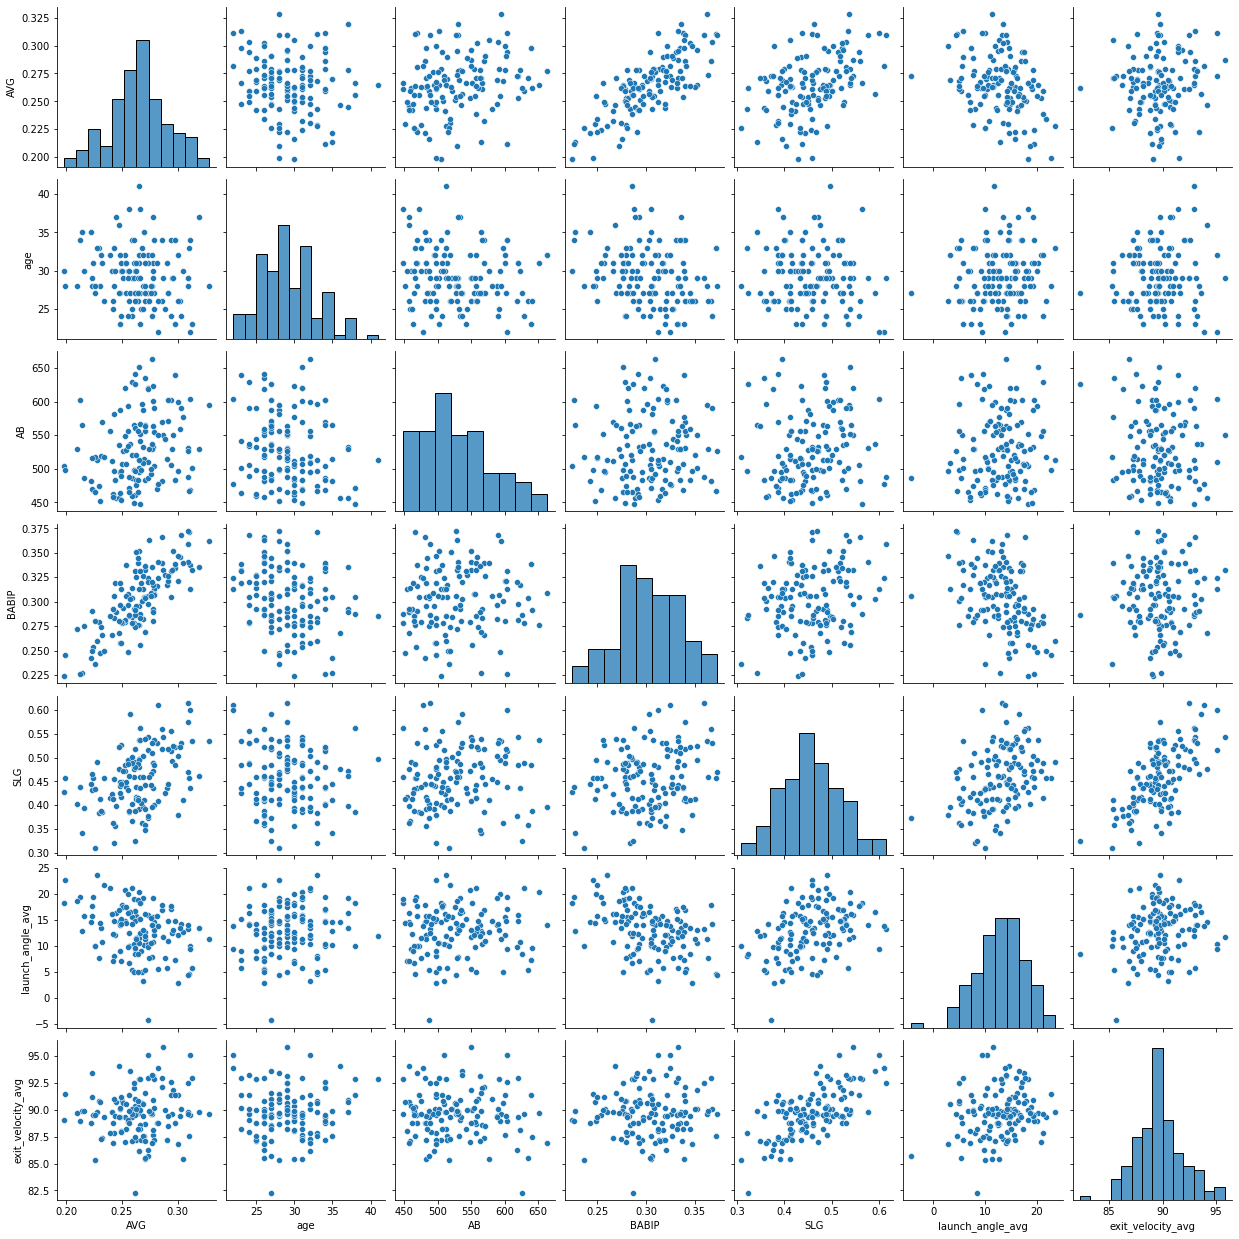

In [ ]:
# Create pairstat database
pairstat = pd.DataFrame({'AVG' : savantstats['batting_avg'], 'age': savantstats['player_age'], 'AB': savantstats['b_ab'], 'BABIP': savantstats['BABIP'], 'SLG': savantstats['slg_percent'], 'launch_angle_avg': savantstats['launch_angle_avg'], 'exit_velocity_avg': savantstats['exit_velocity_avg']})

# Creating pairplot
sns.pairplot(pairstat, height=2.5)

plt.savefig('pairplotv1.png')

## Perform Linear Regression on xBA

In [ ]:
# Split data into correct target and predictor variables, drop 'age' column
X = pairstat.drop(['AVG', 'age'], axis=1)
y = pairstat['AVG']
X.head()

,AB,BABIP,SLG,launch_angle_avg,exit_velocity_avg
0,472,0.304598,0.386,10.0,91.4
1,513,0.285714,0.497,11.8,92.9
2,487,0.303342,0.402,5.3,89.3
3,514,0.305085,0.411,10.2,87.6
4,482,0.242424,0.444,14.6,88.8


In [ ]:
# Split the data into 75% of the training set and 25% test set with random_state=1000.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [ ]:
# Find the linear regression model using the training set
regression_model = LinearRegression()
# Fit linear model.
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print out the coefficients and intercept.
print('coefficients:', regression_model.coef_)
print('intercept:', regression_model.intercept_)

coefficients: [ 6.87266643e-05  4.23050766e-01  2.34717492e-01 -1.38476669e-03
 -2.76821351e-03]
intercept: 0.2585524285122097


In [ ]:
# Find predicted values
predicted_value = regression_model.predict(X_train[X_train.columns])
predicted_value

array([0.31468776, 0.26316893, 0.26888826, 0.25199893, 0.26756486,
       0.25437723, 0.2481883 , 0.28086028, 0.26273549, 0.2318888 ,
       0.24560955, 0.297058  , 0.29370626, 0.26204637, 0.28394542,
       0.27426023, 0.29698238, 0.28955081, 0.24966451, 0.21961002,
       0.24058675, 0.26992437, 0.26369605, 0.23043866, 0.26061714,
       0.2659796 , 0.25541882, 0.26016704, 0.28034801, 0.20703557,
       0.23500629, 0.26796948, 0.25116282, 0.25500555, 0.27471673,
       0.24066225, 0.2576209 , 0.25820839, 0.26888799, 0.2461433 ,
       0.26528884, 0.22515373, 0.29639429, 0.26129421, 0.24417935,
       0.24421579, 0.28128789, 0.29951224, 0.2621933 , 0.26616205,
       0.28068094, 0.23326563, 0.27546926, 0.23399227, 0.27391976,
       0.26302737, 0.24284486, 0.270715  , 0.30624141, 0.2782142 ,
       0.27433231, 0.29605917, 0.27850522, 0.23756987, 0.31023681,
       0.27463332, 0.25678391, 0.23032747, 0.24799466, 0.2298847 ,
       0.26187364, 0.27543374, 0.26630402, 0.29285727, 0.29594

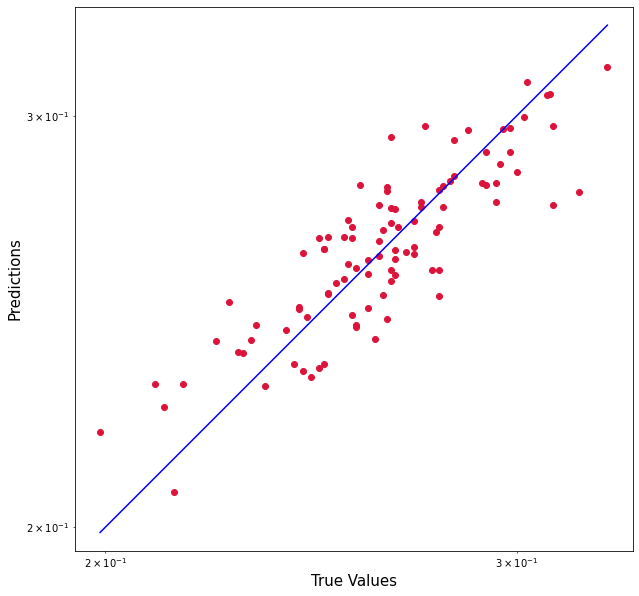

<Figure size 432x288 with 0 Axes>

In [ ]:
# Predicted and Actual Values on the Same Graph
plt.figure(figsize=(10,10))
plt.scatter(y_train, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(y_train))
p2 = min(min(predicted_value), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
plt.savefig('linear_regression.png')

In [ ]:
# Linear Regression Analysis
y_predict = regression_model.predict(X_test)

mea = mean_absolute_error(y_test, y_predict)
print('mean absolute error: ', mea)

regression_model_mse = mean_squared_error(y_predict, y_test)
print('mean square error: ', regression_model_mse)

root_mean_square_error=np.sqrt(regression_model_mse)
print('root_mean_square_error', root_mean_square_error)

r_squared = regression_model.score(X_test, y_test)
print('r-squared value: ', r_squared)

mean absolute error:  0.0085902400717821
mean square error:  0.0001137088777853593
root_mean_square_error 0.010663436490426493
r-squared value:  0.8441760022899305


## Plot of Linear Regression Model

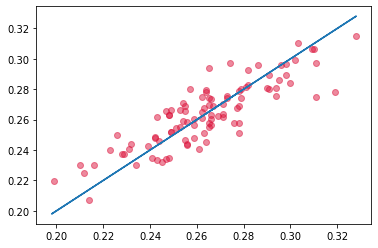

In [ ]:
plt.scatter(y_train, predicted_value, c='crimson', alpha = 0.5, label = 'Linear Regression Model')
x = savantstats['batting_avg']
plt.plot(x, x)
plt.savefig('linear_regression_against_avg.png')

In [ ]:
%%shell
jupyter nbconvert --to html /content/DSCI_200_Final.ipynb

[NbConvertApp] Converting notebook /content/DSCI_200_Final.ipynb to html
[NbConvertApp] Writing 753034 bytes to /content/DSCI_200_Final.html
